In [14]:
import pandas as pd

In [15]:
data = pd.read_csv("../데이터(1차)/서울시_지하철_승하차_인원/202309.csv", encoding='cp949')

# "작업일자" column은 데이터 분석에 불필요한 열이라 제외
data = data.loc[:,~data.columns.isin(["작업일자"])] 

In [16]:
data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202309,1호선,동대문,606,32,10733,1973,9065,6382,14371,...,5496,8967,592,2495,1,224,0,0,0,0
1,202309,1호선,동묘앞,153,1,2841,1084,3817,4586,7469,...,1281,4019,94,1706,0,285,0,0,0,0
2,202309,1호선,서울역,596,34,8298,9361,12634,51377,39681,...,24713,13731,2144,2462,1,186,0,0,0,0
3,202309,1호선,시청,55,3,2238,4729,3924,22886,7976,...,9726,4323,280,842,1,25,0,0,0,0
4,202309,1호선,신설동,366,12,8783,2336,9456,8139,21484,...,3464,9270,319,2118,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,202309,중앙선,원덕,96,3,314,4,646,154,940,...,6,300,1,97,0,0,0,0,0,0
612,202309,중앙선,중랑,263,11,6776,572,9741,2009,22550,...,904,4842,33,451,0,0,0,0,0,0
613,202309,중앙선,지평,0,0,0,0,2,0,361,...,0,0,0,0,0,0,0,0,0,0
614,202309,중앙선,팔당,1,0,271,170,635,1006,1578,...,182,179,0,0,0,0,0,0,0,0


In [17]:
print("호선 수 : {}".format(len(set(data.호선명))));print("지하철역 수 : {}".format(len(set(data.지하철역))))

호선 수 : 27
지하철역 수 : 524


In [18]:
# NA 확인 => 결측치 없음
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           616 non-null    int64 
 1   호선명           616 non-null    object
 2   지하철역          616 non-null    object
 3   04시-05시 승차인원  616 non-null    int64 
 4   04시-05시 하차인원  616 non-null    int64 
 5   05시-06시 승차인원  616 non-null    int64 
 6   05시-06시 하차인원  616 non-null    int64 
 7   06시-07시 승차인원  616 non-null    int64 
 8   06시-07시 하차인원  616 non-null    int64 
 9   07시-08시 승차인원  616 non-null    int64 
 10  07시-08시 하차인원  616 non-null    int64 
 11  08시-09시 승차인원  616 non-null    int64 
 12  08시-09시 하차인원  616 non-null    int64 
 13  09시-10시 승차인원  616 non-null    int64 
 14  09시-10시 하차인원  616 non-null    int64 
 15  10시-11시 승차인원  616 non-null    int64 
 16  10시-11시 하차인원  616 non-null    int64 
 17  11시-12시 승차인원  616 non-null    int64 
 18  11시-12시 하차인원  616 non-null    int64 
 19  12시-13시 

## 승하차 인원(평균, 호선별)
- 2호선, 1호선, 4호선, 3호선, 경인선 순으로 평균 승차, 하차 인원이 많음
- 수인선, 서해선, 경강선, 장항선, 경춘선 순으로 평균 승차, 하차 인원이 적음

In [21]:
# 승차
line = data.groupby("호선명").mean()
line = line.loc[:,["승차" in i for i in line.columns]]

In [22]:
line.mean(axis='columns').sort_values(ascending = False).head()

호선명
2호선    32172.643333
1호선    28915.083333
4호선    23364.980769
3호선    18353.060049
경인선    16437.685417
dtype: float64

In [23]:
line.mean(axis='columns').sort_values(ascending = False).tail()

호선명
수인선    4177.469907
서해선    3699.944444
경강선    3660.318182
장항선    3268.523810
경춘선    2528.769737
dtype: float64

In [24]:
# 하차
line = data.groupby("호선명").mean()
line = line.loc[:,["하차" in i for i in line.columns]]

In [25]:
line.mean(axis='columns').sort_values(ascending = False).head()

호선명
2호선    32626.243333
1호선    28334.987500
4호선    23811.576923
3호선    18278.411765
경인선    16035.889583
dtype: float64

In [26]:
line.mean(axis='columns').sort_values(ascending = False).tail()

호선명
수인선    4084.625000
서해선    3755.875000
경강선    3531.242424
장항선    3111.577381
경춘선    2416.214912
dtype: float64

In [27]:
data.max()[4:].max()

356403

## 호선별 승차 인원 시각화

In [28]:
# 한글 폰트 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [57]:
line = data.loc[:,["호선명", "지하철역"] + [i for i in data.columns if "승차" in i]]
line.columns = [i[0:3] if "승차" in i else i for i in line.columns]

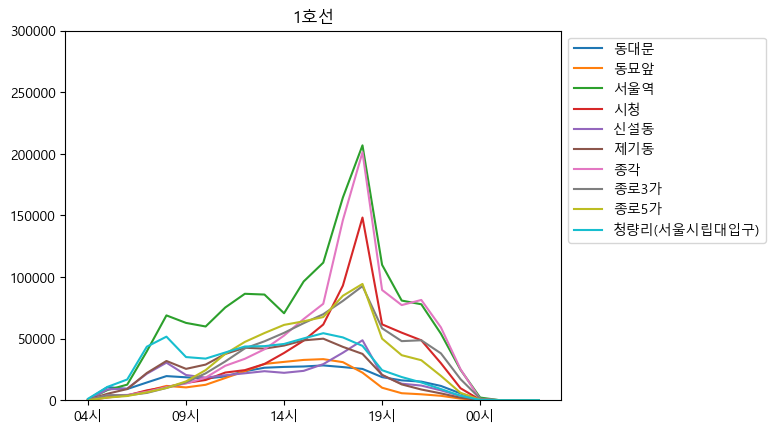

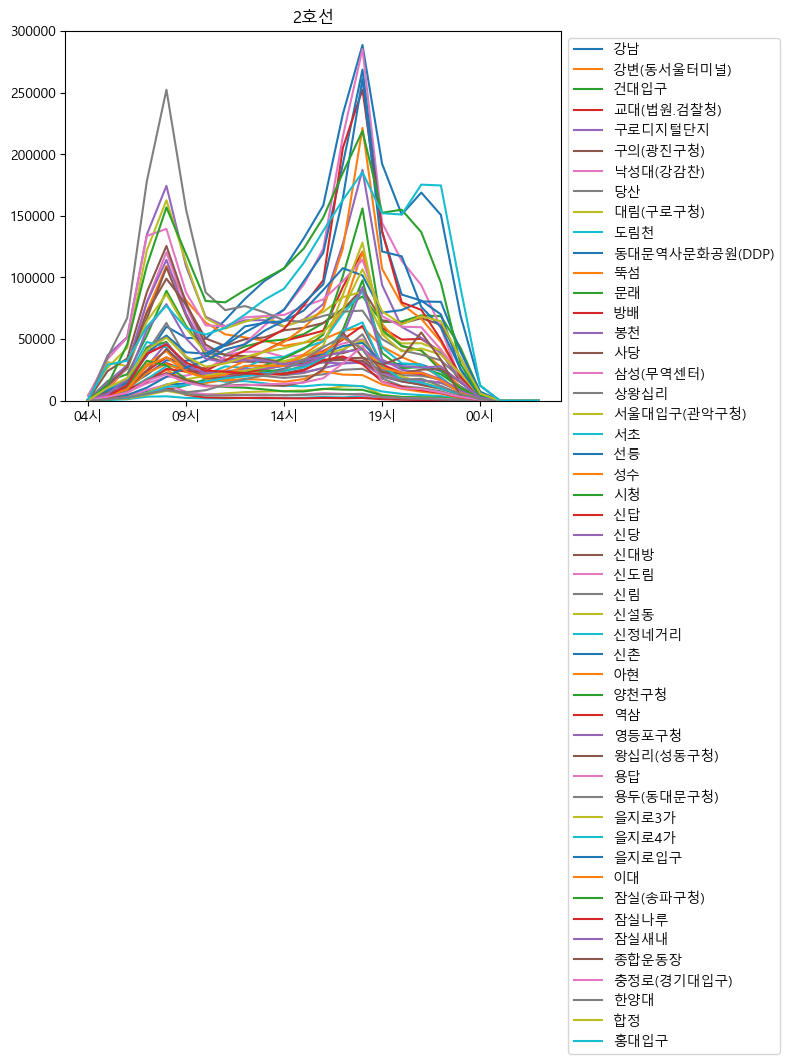

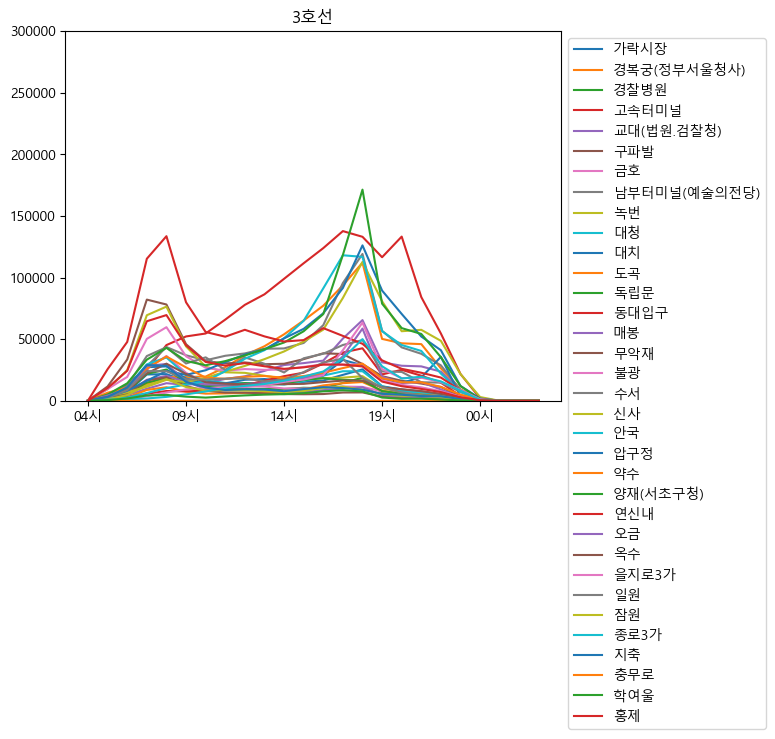

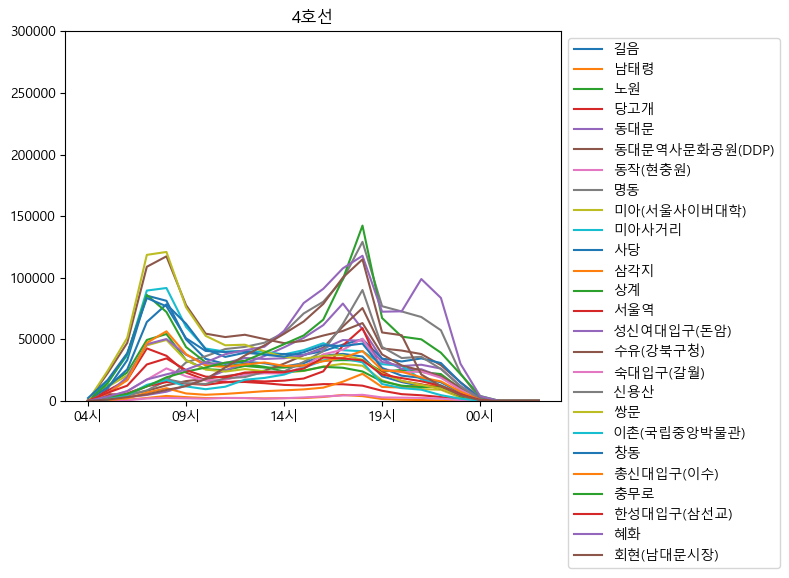

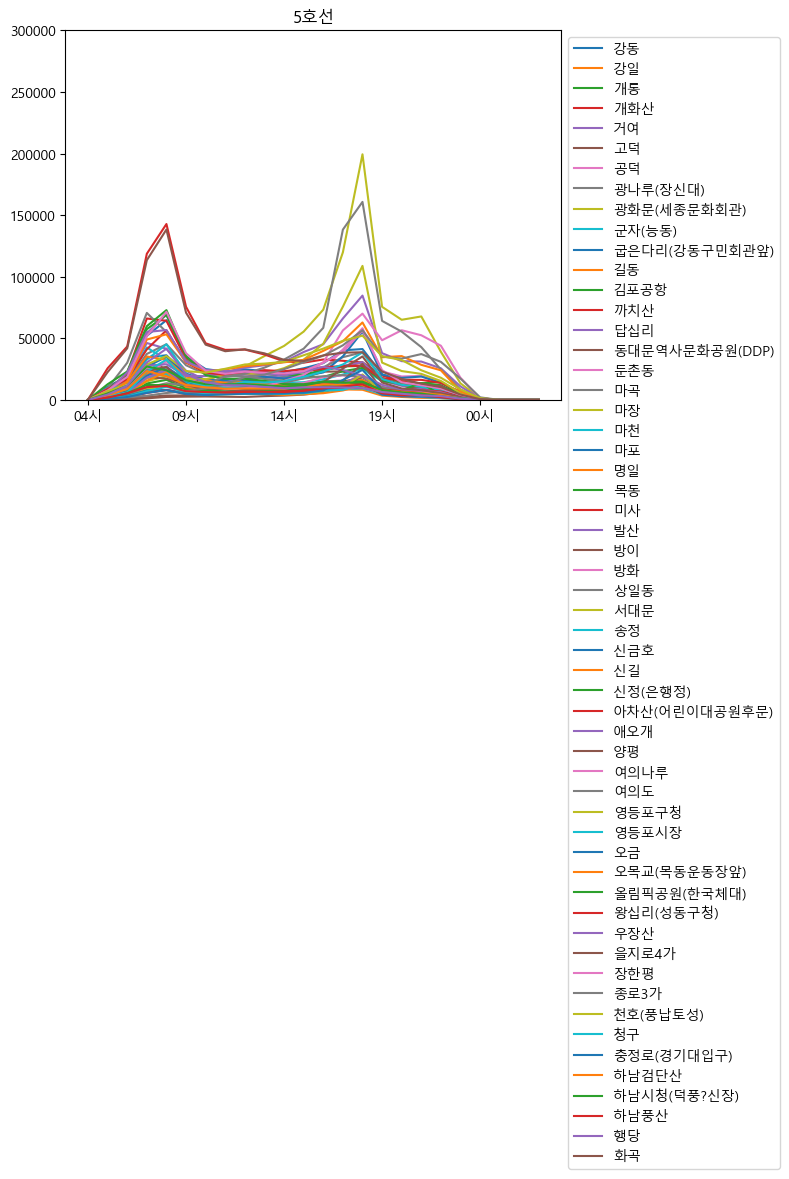

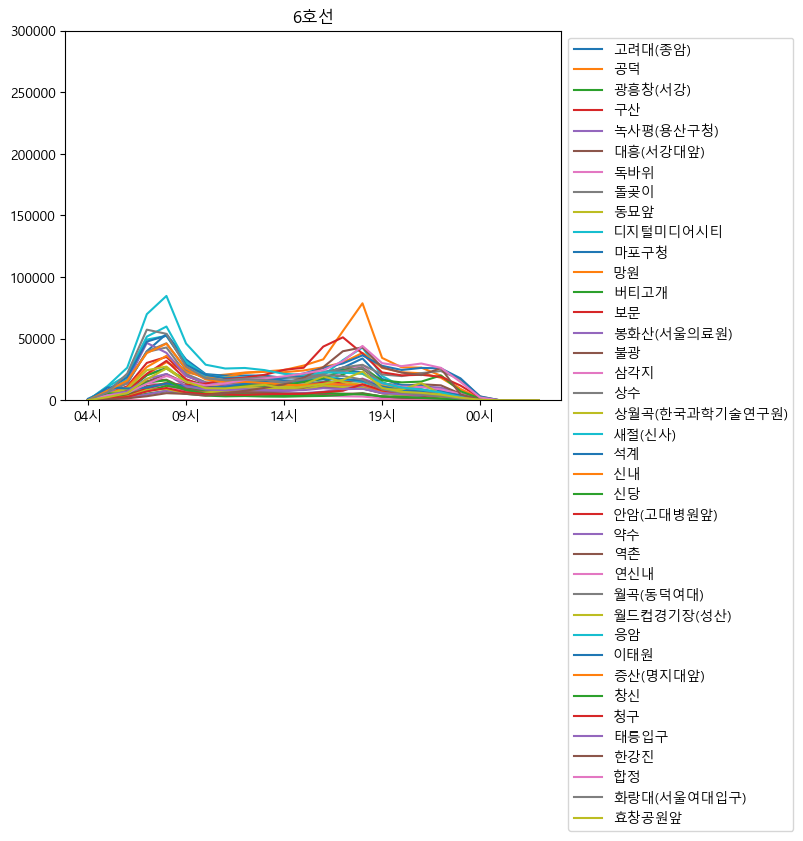

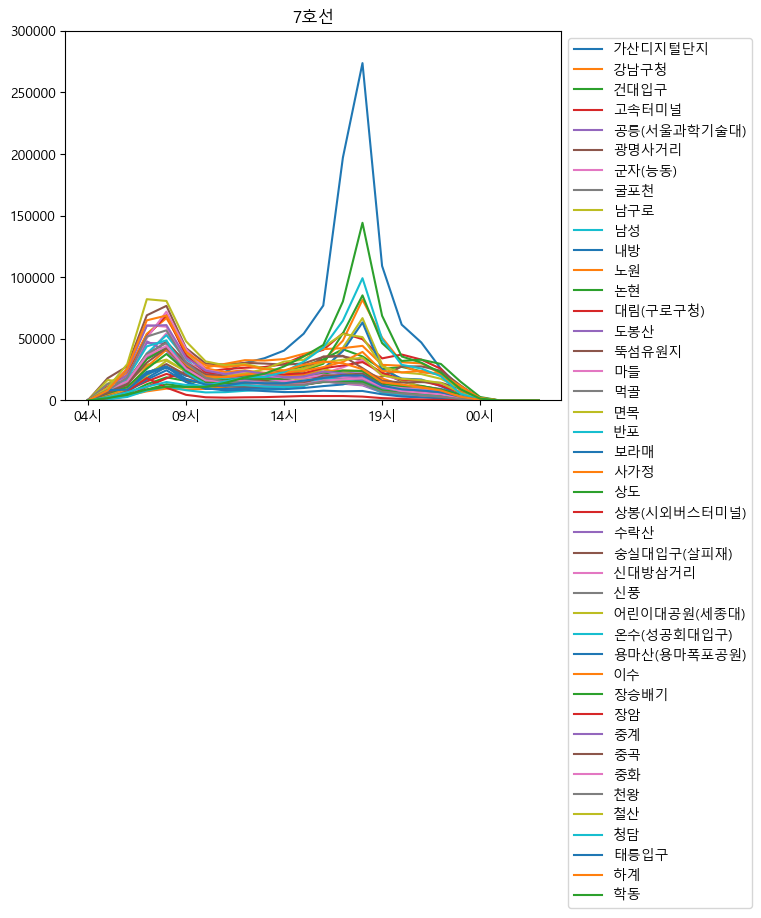

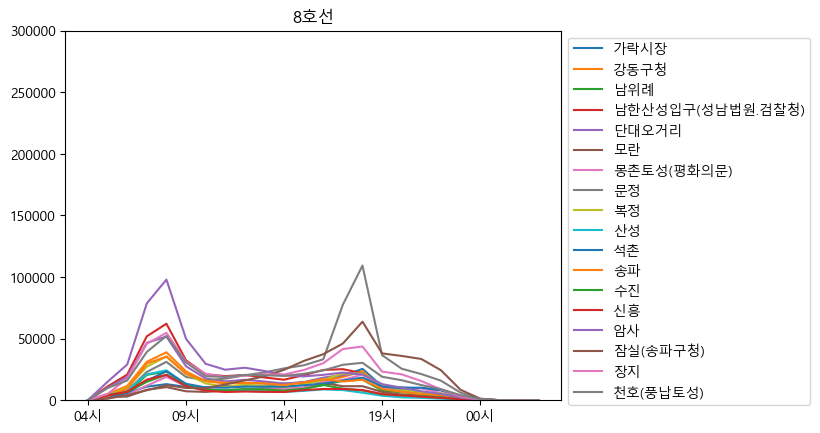

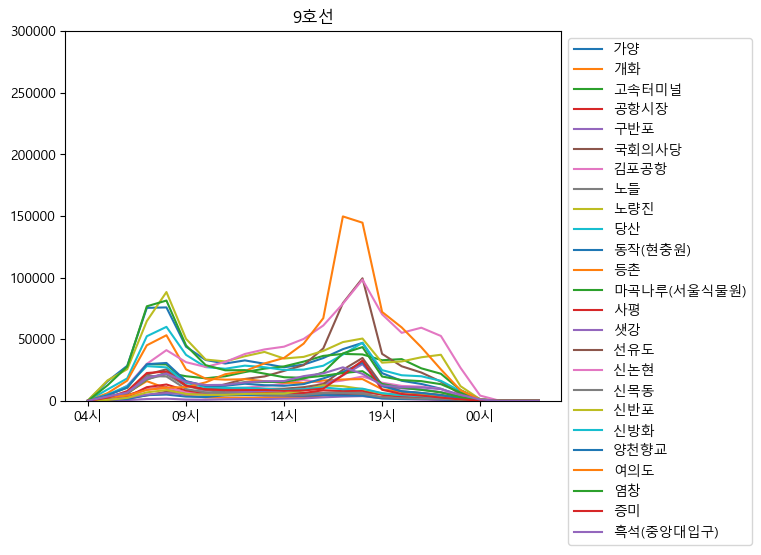

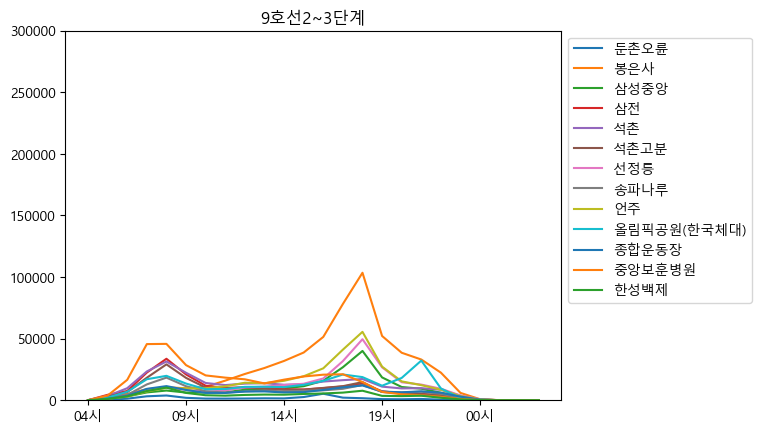

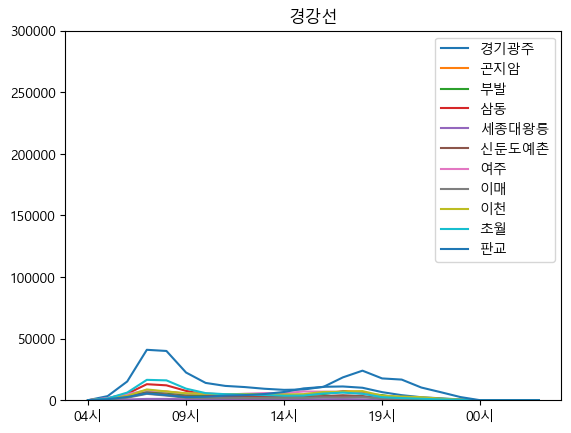

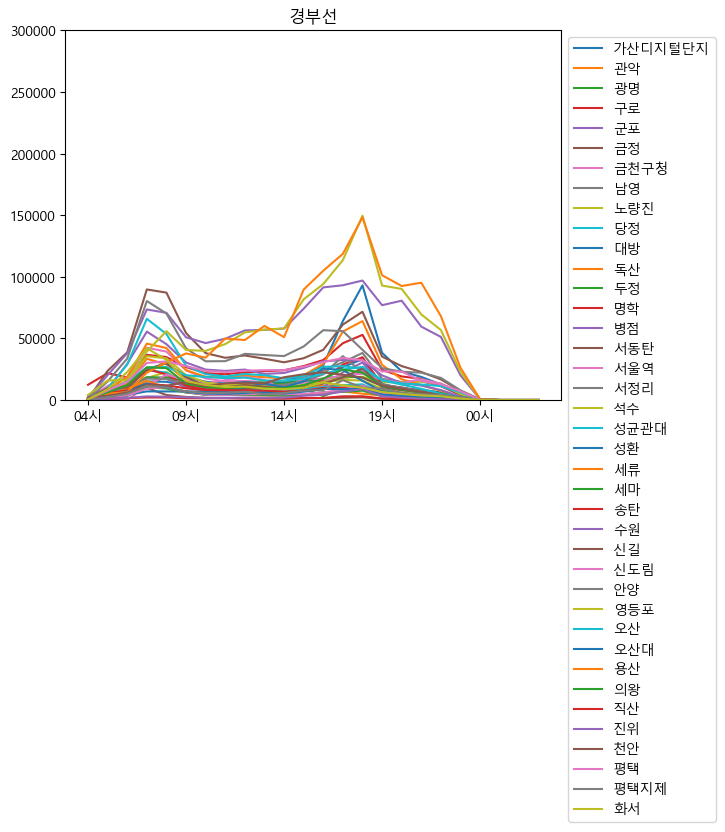

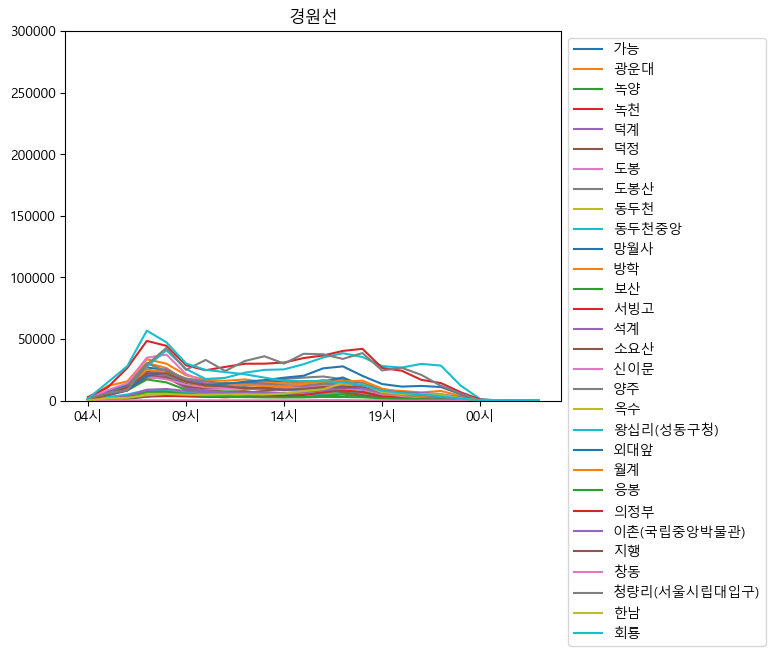

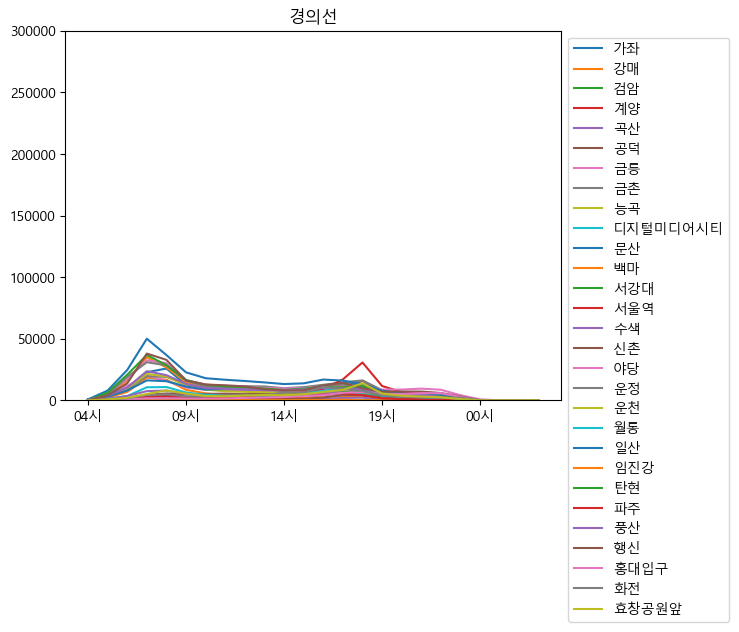

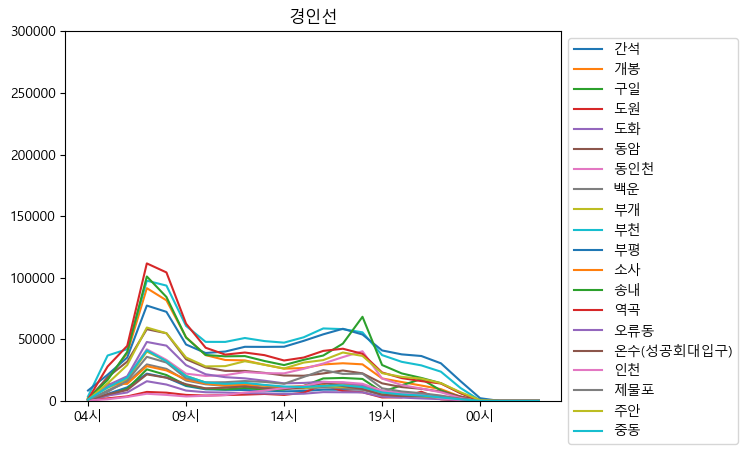

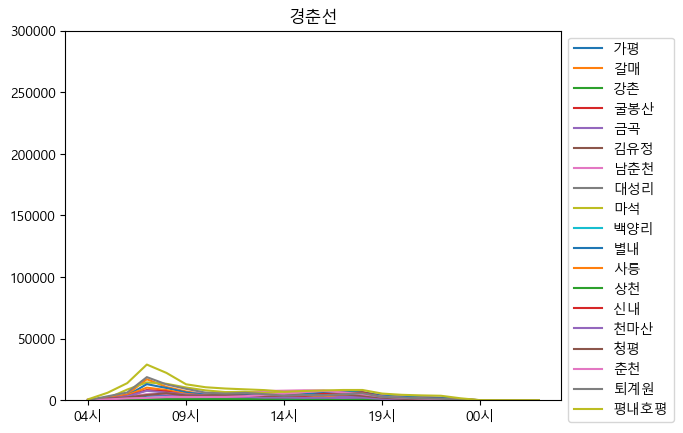

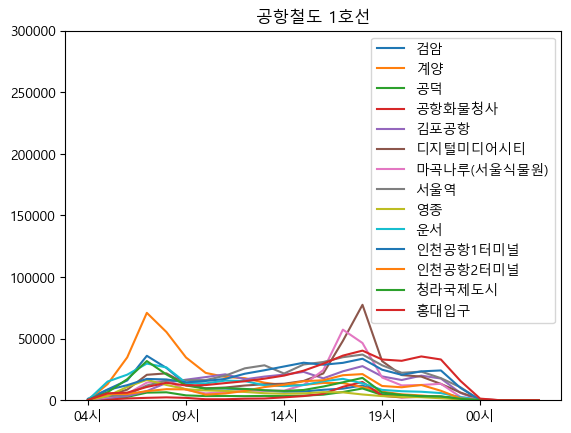

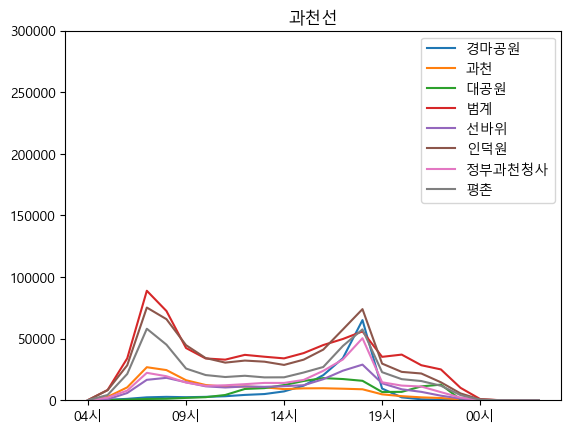

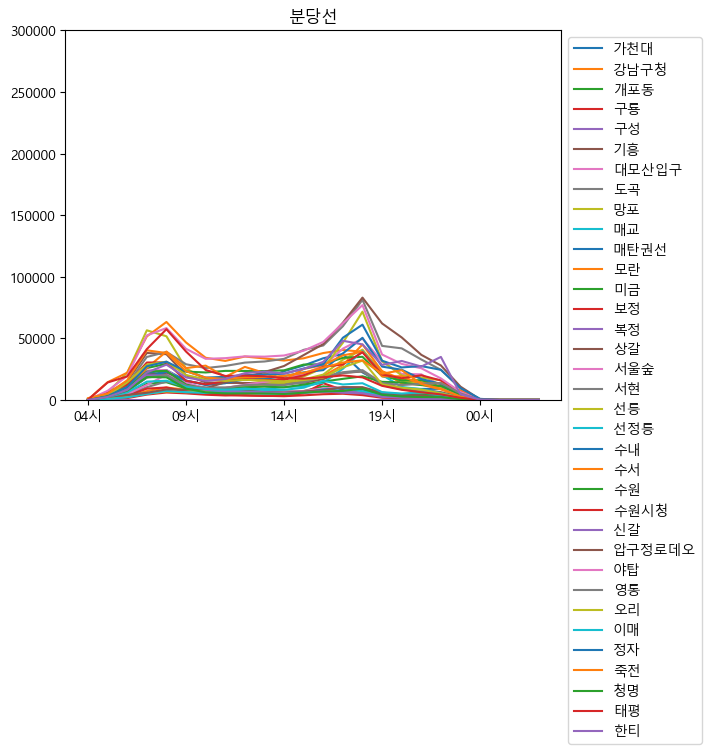

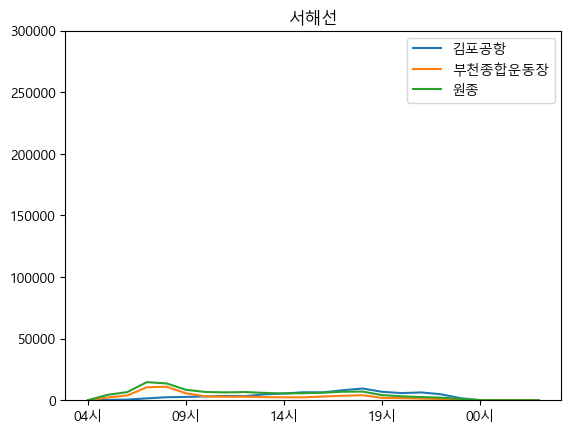

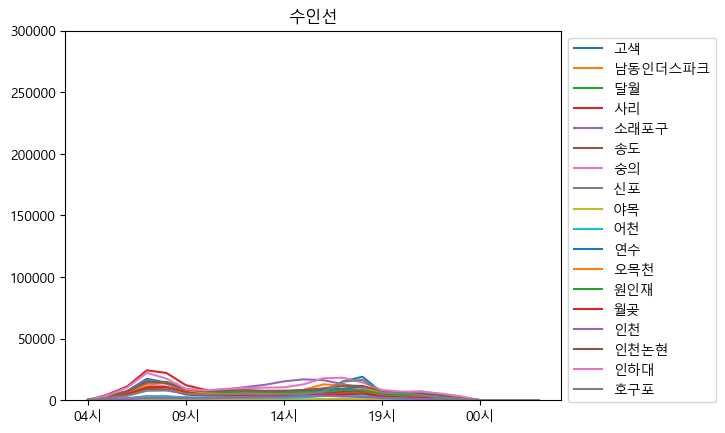

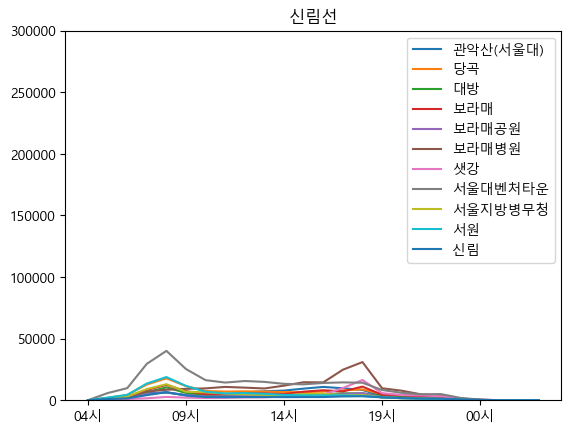

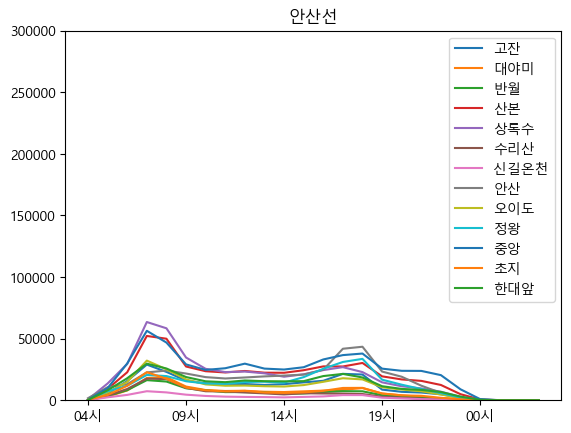

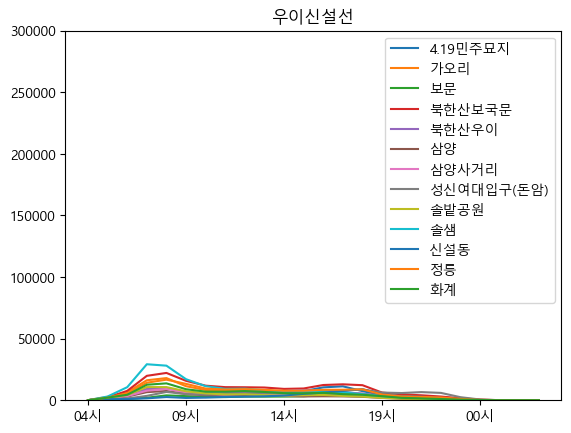

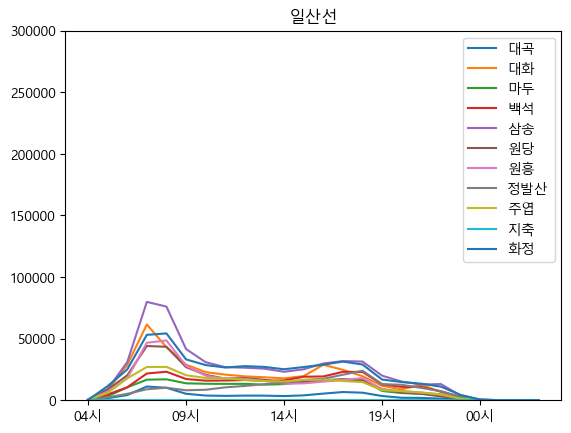

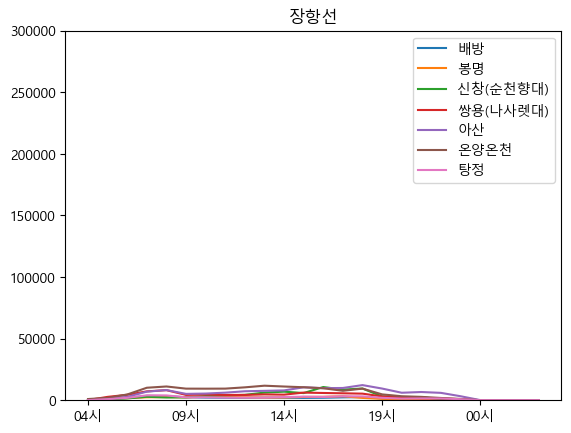

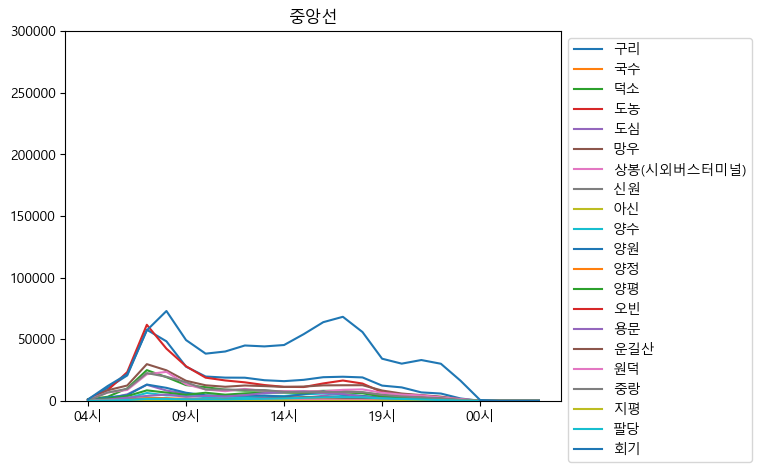

In [70]:
def line_f(line_n):
    line_new = line[line["호선명"] == line_n]
    line_new = line_new.loc[:,~line_new.columns.isin(["호선명"])]
    line_new = line_new.set_index(keys=['지하철역'])
    line_new = line_new.T
    
    line_new.plot()
    plt.ylim([0, 300000])
    plt.legend(loc ='best', bbox_to_anchor=(1, 1))
    plt.title(line_n)
    plt.savefig('./지하철역_시각화/{}.png'.format(line_n), bbox_inches = "tight")
    
    line_head = line_new.mean().sort_values(ascending = False).head()
    line_tail = line_new.mean().sort_values(ascending = False).tail()
    return line_new, line_head, line_tail

line_1, line_1_head, line_1_tail = line_f("1호선")
line_2, line_2_head, line_2_tail = line_f("2호선")
line_3, line_3_head, line_3_tail = line_f("3호선")
line_4, line_4_head, line_4_tail = line_f("4호선")
line_5, line_5_head, line_5_tail = line_f("5호선")
line_6, line_6_head, line_6_tail = line_f("6호선")
line_7, line_7_head, line_7_tail = line_f("7호선")
line_8, line_8_head, line_8_tail = line_f("8호선")
line_9, line_9_head, line_9_tail = line_f("9호선")
line_10, line_10_head, line_10_tail = line_f("9호선2~3단계")
line_11, line_11_head, line_11_tail = line_f("경강선")
line_12, line_12_head, line_12_tail = line_f("경부선")
line_13, line_13_head, line_13_tail = line_f("경원선")
line_14, line_14_head, line_14_tail = line_f("경의선")
line_15, line_15_head, line_15_tail = line_f("경인선")
line_16, line_16_head, line_16_tail = line_f("경춘선")
line_17, line_17_head, line_17_tail = line_f("공항철도 1호선")
line_18, line_18_head, line_18_tail = line_f("과천선")
line_19, line_19_head, line_19_tail = line_f("분당선")
line_20, line_20_head, line_20_tail = line_f("서해선")
line_21, line_21_head, line_21_tail = line_f("수인선")
line_22, line_22_head, line_22_tail = line_f("신림선")
line_23, line_23_head, line_23_tail = line_f("안산선")
line_24, line_24_head, line_24_tail = line_f("우이신설선")
line_25, line_25_head, line_25_tail = line_f("일산선")
line_26, line_26_head, line_26_tail = line_f("장항선")
line_27, line_27_head, line_27_tail = line_f("중앙선")

In [74]:
line_19.columns

Index(['가천대', '강남구청', '개포동', '구룡', '구성', '기흥', '대모산입구', '도곡', '망포', '매교',
       '매탄권선', '모란', '미금', '보정', '복정', '상갈', '서울숲', '서현', '선릉', '선정릉', '수내',
       '수서', '수원', '수원시청', '신갈', '압구정로데오', '야탑', '영통', '오리', '이매', '정자', '죽전',
       '청명', '태평', '한티'],
      dtype='object', name='지하철역')

In [71]:
line_1_head, line_1_tail

(지하철역
 서울역     62475.041667
 종각      43240.166667
 종로3가    31380.541667
 시청      30251.833333
 종로5가    29910.708333
 dtype: float64,
 지하철역
 청량리(서울시립대입구)    26438.375000
 제기동             21604.541667
 신설동             16443.500000
 동대문             15085.000000
 동묘앞             12321.125000
 dtype: float64)

In [275]:
line_2_head, line_2_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [276]:
line_3_head, line_3_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [277]:
line_4_head, line_4_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [278]:
line_5_head, line_5_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [279]:
line_6_head, line_6_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [280]:
line_7_head, line_7_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [281]:
line_8_head, line_8_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [282]:
line_9_head, line_9_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [283]:
line_10_head, line_10_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [284]:
line_11_head, line_11_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [285]:
line_12_head, line_12_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [286]:
line_13_head, line_13_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [287]:
line_14_head, line_14_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [288]:
line_15_head, line_15_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [289]:
line_16_head, line_16_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [290]:
line_17_head, line_17_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [291]:
line_18_head, line_18_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [292]:
line_19_head, line_19_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [293]:
line_20_head, line_20_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [294]:
line_21_head, line_21_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [295]:
line_22_head, line_22_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [296]:
line_23_head, line_23_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [297]:
line_24_head, line_24_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [298]:
line_25_head, line_25_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [299]:
line_26_head, line_26_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64

In [300]:
line_27_head, line_27_tail

지하철역
서울역     62475.041667
종각      43240.166667
종로3가    31380.541667
시청      30251.833333
종로5가    29910.708333
dtype: float64